In [9]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [2]:
#tablice wielowymiarowe w Julii
Asmall=[[15.5 18.9]; [0.5 0.2]]
Bsmall=[[13.3 10.1]; [0.7 0.6]]
#size(B,1)

2×2 Array{Float64,2}:
 13.3  10.1
  0.7   0.6

In [3]:
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 219.38  167.89
   6.79    5.17

In [10]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [15]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 219.38  167.89
   6.79    5.17

In [17]:
A=rand(1000,1000);
B=rand(1000,1000);
A

1000×1000 Array{Float64,2}:
 0.980369  0.553745   0.416387  …  0.41435    0.724664   0.655476 
 0.105779  0.0512045  0.410094     0.749724   0.910071   0.159921 
 0.526421  0.142252   0.237008     0.641177   0.689797   0.923973 
 0.4683    0.259043   0.618338     0.849925   0.990533   0.169855 
 0.882874  0.960799   0.453403     0.513889   0.403391   0.296762 
 0.856666  0.411312   0.735866  …  0.0502851  0.420341   0.976981 
 0.925931  0.591693   0.741981     0.244257   0.0981907  0.515014 
 0.947623  0.328798   0.101681     0.798857   0.950068   0.448082 
 0.258327  0.971948   0.502251     0.799213   0.610935   0.706989 
 0.45767   0.545494   0.776529     0.738277   0.37144    0.722066 
 0.517079  0.772995   0.564445  …  0.871044   0.343589   0.676687 
 0.618658  0.188902   0.557542     0.653603   0.629103   0.457906 
 0.91867   0.956747   0.630929     0.980326   0.364742   0.112751 
 ⋮                              ⋱                                 
 0.807616  0.0372487  0.183661    

In [18]:
@elapsed naive_multiplication(A,B)

3.631910598

In [19]:
@elapsed better_multiplication(A,B)

1.631234389

In [20]:
@elapsed A*B

0.50864676

In [35]:
using Plots
using DataFrames
df1=DataFrame(size = Int[], naive_times = Float64[], better_times = Float64[], blas_times = Float64[])

for i=10:10:200
    for j=1:10
        Atest = rand(i, i)
        Btest = rand(i, i)
        naive_value = @elapsed naive_multiplication(Atest, Btest)

        if naive_value > 0.02
            naive_value = df1[:naive_times][i - 10]
        end

        better_value = @elapsed better_multiplication(Atest, Btest)

        if better_value > 0.02
            better_value = df1[:better_times][i - 10]
        end

        blas_value = @elapsed Atest * Btest

        if blas_value > 0.02
            blas_value = df1[:blas_times][i - 10]
        end
        push!(df1, [i naive_value better_value blas_value])
    end
end

show(df1)

# scatter([10:100], [naive_times, better_times, blas_times], label=["naive" "better" "blas"])

200×4 DataFrame
│ Row │ size  │ naive_times │ better_times │ blas_times  │
│     │ Int64 │ Float64     │ Float64      │ Float64     │
├─────┼───────┼─────────────┼──────────────┼─────────────┤
│ 1   │ 10    │ 7.9e-6      │ 7.5e-6       │ 1.0e-5      │
│ 2   │ 10    │ 2.9e-6      │ 2.2e-6       │ 1.3e-6      │
│ 3   │ 10    │ 3.2e-6      │ 2.3e-6       │ 9.0e-7      │
│ 4   │ 10    │ 7.2e-6      │ 2.3e-6       │ 1.0e-6      │
│ 5   │ 10    │ 4.36e-5     │ 1.14e-5      │ 1.6e-6      │
│ 6   │ 10    │ 2.8e-6      │ 2.1e-6       │ 1.0e-6      │
│ 7   │ 10    │ 2.6e-6      │ 2.2e-6       │ 1.0e-6      │
⋮
│ 193 │ 200   │ 0.0158335   │ 0.0116169    │ 0.000401402 │
│ 194 │ 200   │ 0.0158335   │ 0.0138166    │ 0.000199001 │
│ 195 │ 200   │ 0.0158335   │ 0.0116169    │ 0.000280001 │
│ 196 │ 200   │ 0.0158335   │ 0.0137086    │ 0.000215501 │
│ 197 │ 200   │ 0.0158335   │ 0.013964     │ 0.000387102 │
│ 198 │ 200   │ 0.0158335   │ 0.0116169    │ 0.000349102 │
│ 199 │ 200   │ 0.0158335   │ 0.013453

In [31]:
using Statistics

df2 = by(df1, :size, df->DataFrame(naive_times_mean=mean(df[:naive_times]), naive_times_std=std(df[:naive_times]),
        better_times_mean=mean(df[:better_times]), better_times_std=std(df[:better_times]), blas_times_mean=mean(df[:blas_times]),
    blas_times_std=std(df[:blas_times])))

,size,naive_times_mean,naive_times_std,better_times_mean,better_times_std,blas_times_mean,blas_times_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,4.08e-6,4.01519e-6,2.24e-6,1.89737e-7,1.01101e-5,1.66181e-5
2,20,2.30202e-5,8.05227e-7,1.60501e-5,2.93719e-6,3.22e-6,2.10386e-6
3,30,8.93603e-5,1.82295e-5,5.01004e-5,4.01492e-6,9.7301e-6,5.08194e-6
4,40,0.000218321,1.97265e-5,0.000136301,2.66446e-5,1.49701e-5,5.66841e-6
5,50,0.000441522,2.05235e-5,0.000260131,3.39311e-5,2.35101e-5,4.18997e-6
6,60,0.000781064,2.70071e-5,0.000424572,2.1383e-5,4.34802e-5,1.23696e-5
7,70,0.00125975,1.93249e-5,0.000653933,2.65853e-5,7.85003e-5,3.69619e-5
8,80,0.00187035,3.80083e-5,0.000955485,6.21232e-5,7.25202e-5,1.62551e-5
9,90,0.00267166,6.35495e-5,0.00131979,9.1827e-5,9.53104e-5,2.01014e-5


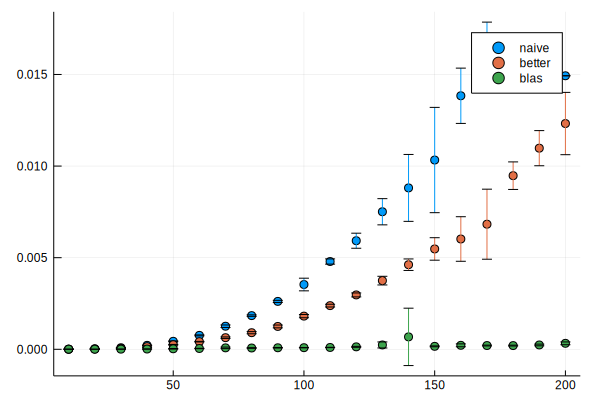

In [28]:
scatter(df2[:size], [df2[:naive_times_mean], df2[:better_times_mean], df2[:blas_times_mean]],
    yerr=[df2[:naive_times_std] df2[:better_times_std] df2[:blas_times_std]], label=["naive" "better" "blas"]) 
    # sam wykres czasow

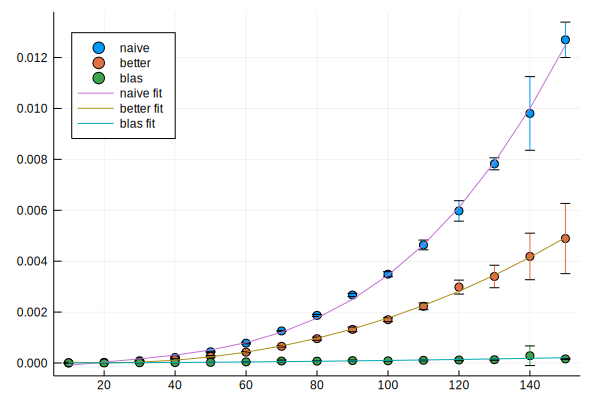

In [32]:
using Polynomials
naive_fit=polyfit(df2[:size], df2[:naive_times_mean], 3)
better_fit=polyfit(df2[:size], df2[:better_times_mean], 3)
blas_fit=polyfit(df2[:size], df2[:blas_times_mean], 3)

scatter(df2[:size], [df2[:naive_times_mean], df2[:better_times_mean], df2[:blas_times_mean]],
    yerr=[df2[:naive_times_std] df2[:better_times_std] df2[:blas_times_std]], label=["naive" "better" "blas"], 
    legend=:topleft)

plot!(df2[:size], polyval(naive_fit, df2[:size]), label="naive fit")
plot!(df2[:size], polyval(better_fit, df2[:size]), label="better fit")
plot!(df2[:size], polyval(blas_fit, df2[:size]), label="blas fit")

In [1]:
using CSV
input="data_lab3.csv"
data=CSV.read(input, delim=",")

,size,naive_time,better_time,blas_time
,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,25,0.000237996,0.000231525,4.1348e-5
2,25,0.000269561,0.000229555,3.9292e-5
3,25,0.00023506,0.00022926,4.6194e-5
4,25,0.00023536,0.000229829,4.3048e-5
5,25,0.000234973,0.000238429,3.9076e-5
6,25,0.000235651,0.000229592,3.9107e-5
7,25,0.000241124,0.000229482,3.9186e-5
8,25,0.000235472,0.000235793,3.9122e-5
9,25,0.000234917,0.000229463,3.913e-5


In [2]:
using DataFrames
using Statistics

data2 = by(data, :size,  df->DataFrame(
        naive_times_mean=mean(df[:naive_time]), naive_times_std=std(df[:naive_time]),
        better_times_mean=mean(df[:better_time]), better_times_std=std(df[:better_time]), 
        blas_times_mean=mean(df[:blas_time]), blas_times_std=std(df[:blas_time])
        ))

,size,naive_times_mean,naive_times_std,better_times_mean,better_times_std,blas_times_mean,blas_times_std
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,25,0.000240148,1.06313e-5,0.000231261,3.20838e-6,4.04698e-5,2.40963e-6
2,50,0.00161783,0.000512718,0.00148446,0.000467235,0.000245698,8.77565e-5
3,75,0.0019665,0.000385851,0.00180373,0.000223938,0.000306449,3.84221e-5
4,100,0.0042445,0.000271709,0.00401598,0.000108306,0.000681869,5.07641e-5
5,125,0.00805762,0.000474032,0.00782551,0.000340597,0.00127803,7.69073e-5
6,150,0.0137405,0.000535865,0.0131508,0.000298386,0.00216022,4.89834e-5
7,175,0.0220974,0.00035904,0.0207023,0.000428919,0.00336639,6.68755e-5
8,200,0.0368227,0.000979422,0.030978,0.000472213,0.00525206,0.000375347
9,225,0.0583892,0.00835994,0.0453164,0.00259979,0.00771097,0.000612442


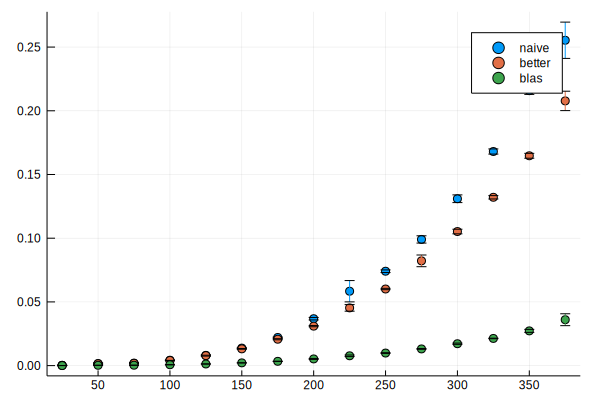

In [3]:
using Plots

scatter(data2[:size], [data2[:naive_times_mean], data2[:better_times_mean], data2[:blas_times_mean]],
    yerr=[data2[:naive_times_std] data2[:better_times_std] data2[:blas_times_std]], label=["naive" "better" "blas"])
    # sam wykres czasow

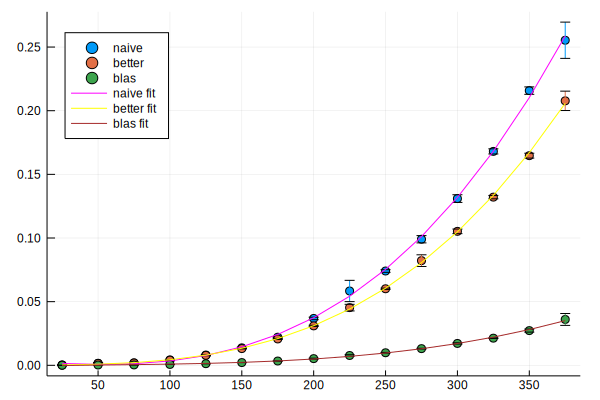

In [4]:
# wykres czasow z C z aproxymacja
using Polynomials

naive_fit_c=polyfit(data2[:size], data2[:naive_times_mean], 3)
better_fit_c=polyfit(data2[:size], data2[:better_times_mean], 3)
blas_fit_c=polyfit(data2[:size], data2[:blas_times_mean], 3)

scatter(data2[:size], [data2[:naive_times_mean], data2[:better_times_mean], data2[:blas_times_mean]],
        yerr=[data2[:naive_times_std] data2[:better_times_std] data2[:blas_times_std]], label=["naive" "better" "blas"],
        legend=:topleft)

plot!(data2[:size], polyval(naive_fit_c, data2[:size]), label="naive fit", colour="magenta")
plot!(data2[:size], polyval(better_fit_c, data2[:size]), label="better fit", colour="yellow")
plot!(data2[:size], polyval(blas_fit_c, data2[:size]), label="blas fit", colour="brown")

In [5]:
using CSV
input="data_lab3_opti.csv"
data_opti=CSV.read(input, delim=",")

,size,naive_time,better_time,blas_time
,Int64⍰,Float64⍰,Float64⍰,Float64⍰
1,25,5.697e-5,2.2392e-5,4.6812e-5
2,25,5.3679e-5,2.1344e-5,5.7424e-5
3,25,5.3732e-5,2.1384e-5,4.4209e-5
4,25,5.3775e-5,2.1382e-5,4.3909e-5
5,25,5.3676e-5,2.1341e-5,4.3843e-5
6,25,5.3721e-5,2.1321e-5,4.3892e-5
7,25,5.3644e-5,2.1355e-5,4.3831e-5
8,25,5.3683e-5,2.1321e-5,4.3821e-5
9,25,5.3701e-5,2.5211e-5,1.3029e-5


In [6]:
using DataFrames
using Statistics

data_opti_2 = by(data_opti, :size,  df->DataFrame(
        naive_times_mean=mean(df[:naive_time]), naive_times_std=std(df[:naive_time]),
        better_times_mean=mean(df[:better_time]), better_times_std=std(df[:better_time]), 
        blas_times_mean=mean(df[:blas_time]), blas_times_std=std(df[:blas_time])
        ))

,size,naive_times_mean,naive_times_std,better_times_mean,better_times_std,blas_times_mean,blas_times_std
,Int64⍰,Float64,Float64,Float64,Float64,Float64,Float64
1,25,5.02473e-5,1.21149e-5,2.03355e-5,5.07814e-6,3.93794e-5,1.45047e-5
2,50,0.000135012,7.18367e-6,5.30616e-5,2.13334e-6,9.85246e-5,2.94601e-6
3,75,0.000532246,1.56398e-5,0.000161851,5.1355e-6,0.000374355,1.31638e-5
4,100,0.0011572,8.43965e-5,0.000365768,4.56026e-5,0.000791992,0.000148974
5,125,0.0021862,0.000171619,0.000610802,2.48153e-5,0.0012667,3.35309e-5
6,150,0.00376033,0.000250355,0.00115085,4.73682e-5,0.00220054,0.000110711
7,175,0.0059764,0.000155104,0.00183391,8.7373e-5,0.00346248,0.000218486
8,200,0.00898705,0.000223694,0.00270589,0.000199596,0.00505158,0.000126641
9,225,0.0131622,0.000351615,0.0037867,9.24505e-5,0.00716373,0.000137548


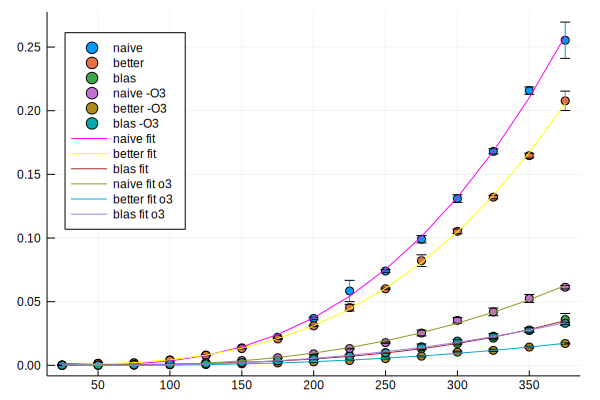

In [7]:
# wykres czasow  z C + C optymalizowane i ich aproxymacje
using Polynomials
using Plots

scatter(data2[:size], [data2[:naive_times_mean], data2[:better_times_mean], data2[:blas_times_mean], 
        data_opti_2[:naive_times_mean], data_opti_2[:better_times_mean], data_opti_2[:blas_times_mean]],
        yerr=[data2[:naive_times_std] data2[:better_times_std] data2[:blas_times_std] data_opti_2[:naive_times_std] data_opti_2[:better_times_std] data_opti_2[:blas_times_std]],
        label=["naive" "better" "blas" "naive -O3" "better -O3" "blas -O3"], legend=:topleft)

plot!(data2[:size], polyval(naive_fit_c, data2[:size]), label="naive fit", colour="magenta")
plot!(data2[:size], polyval(better_fit_c, data2[:size]), label="better fit", colour="yellow")
plot!(data2[:size], polyval(blas_fit_c, data2[:size]), label="blas fit", colour="brown")

naive_fit_c_o3=polyfit(data_opti_2[:size], data_opti_2[:naive_times_mean], 3)
better_fit_c_o3=polyfit(data_opti_2[:size], data_opti_2[:better_times_mean], 3)
blas_fit_c_o3=polyfit(data_opti_2[:size], data_opti_2[:blas_times_mean], 3)

plot!(data_opti_2[:size], polyval(naive_fit_c_o3, data_opti_2[:size]), label="naive fit o3")
plot!(data_opti_2[:size], polyval(better_fit_c_o3, data_opti_2[:size]), label="better fit o3")
plot!(data_opti_2[:size], polyval(blas_fit_c_o3, data_opti_2[:size]), label="blas fit o3")



